In this notebook, I'll be exploring the data related to disability, categorizing them, summarizing findings and saving the final results into csv files.

Since "none of the above" option does not necessarily mean "no disability", I used the data from the "disease" file and for anyone who had "no health issues", "no disability" was added. The final result will have less people with "no disability" than those with "no health conditions" because of the conditions I put herein. If any disability is indicated in the data here, the "no disability" is over-riden.

In [54]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

In [2]:
# import data:
NS_disability = pd.read_csv('original_disability_data.csv')

In [3]:
# checking null values:
NS_disability.isna().sum()

participant_ID                        0
disability_none                    1847
disability_physical                3581
disability_chronic_pain            3480
disability_sensory                 3921
disability_developmental           3880
disability_learning                3835
disability_mental                  3658
disability_prefer_not_to_answer    3688
disability_other                   3970
dtype: int64

In [4]:
NS_disability.describe(include = 'all')

,participant_ID,disability_none,disability_physical,disability_chronic_pain,disability_sensory,disability_developmental,disability_learning,disability_mental,disability_prefer_not_to_answer,disability_other
count,4054,2207,473,574,133,174,219,396,366,84
unique,4054,1,1,1,1,1,1,1,1,71
top,ns 757,none of the above,physical disability,chronic illness / pain,sensory disability,developmental disability,learning disability,mental illness,prefer not to answer,none
freq,1,2207,473,574,133,174,219,396,366,7


We can see that there are multiple values in the "other" column, let's check them out:

In [5]:
NS_disability.disability_other.unique()

array([nan, 'hiv copd athsma', 'hiv positive', 'addiction recovery',
       'hiv',
       'i find it hard to walk distances and the caldwell foodbank has stairs and plus now that it has moved, its impossible to get there',
       'adhd', 'special needs child', 'nerves infection',
       'i dont have work', '2 of my children have disabilities',
       'back pain', 'alcoholism', 'none',
       'chronic tireness and weakness and lack of energy.  have feeling of unrest and overwhelming feeling.',
       'brain injury',
       'i was diagnosed with adhd when i was 11. i also have ocd i donâ€™t like being touched. iâ€™m sensitive to light blind in my left eye and i have a problem with my optic nerve which is mainly my adhd problem and i do sometimes get angry but this is, why i enjoy my own company',
       'adhd and mild autism', 'dependence', 'childrens needs not my own',
       'no', 'chemical imbalance', 'hearing impairment', 'hearing loss',
       'ptsd', 'bone loss', 'adhd/autism', 'ge

In [6]:
NS_disability.columns

Index(['participant_ID', 'disability_none', 'disability_physical',
       'disability_chronic_pain', 'disability_sensory',
       'disability_developmental', 'disability_learning', 'disability_mental',
       'disability_prefer_not_to_answer', 'disability_other'],
      dtype='object')

In [7]:
# Define keywords for each disability option
keywords = {
    'physical disability': ['walk','back', 'disc', 'asthma', 'physical', 'leg', 'cholesterol','coronary', 'heart',
                 'hypercholestérolémie', 'cancer', 'bone','osteoporosis'],
    
    'chronic illness / pain': ['chronic', 'disc','neuritis', 'copd','pain', 'brain','leg', 'back', 'osteoporosis', 'bone', 'arthritis',],
    
    'sensory disability': ['hearing', 'short sighted', 'stuttering', 'blind', 'optic'],
    
    'developmental disability': ['autism', 'special needs', 'adhd', 'add','neurodivergent', 'dyslexia'],
    
    'learning disability': ['adhd', 'add', 'dyslexia'],
    
    'mental illness': ['depression', 'mental', 'ptsd', 'stress','anxiety','work', 'trauma', 'addiction', 'dependence', 'alcoholism',  'neurodivergent'],
    
    'neurological' : ['epilepsy', 'brain', 'nerves', 'neuritis'],
    
    'hormonal': ['chemical', 'pcos'],
    
    'autoimmune disease' : ['hiv','celiac'],
    
    'age-related physical' : ['age','old', 'seniors',],
    
    'dental' : ['dental'],
    
    'genetic disorders': ['genetic'],
    
    'no disability' : ['none', 'well', 'no','children', 'husband']
    }


In [8]:
# I'll create columns for the new disability options:
NS_disability[['disability_neurological','disability_hormonal', 'disability_autoimmune', 'disability_age-related', 'disability_dental', 'disability_genetic_disorders', 'disability_no_disability']] = None

In [9]:
# Function to classify answers based on keywords
def classify_disability(answer, keywords):
        
    if isinstance(answer, str):
        answer_lower = answer.lower()
        matched_options = []
        
        for option, keywords in keywords.items():
            if any(keyword in answer_lower for keyword in keywords):
                if option not in matched_options:
                    matched_options.append(option)

        
        terms = ['prefer not to answer', 'none of the above', 'no disability']
    
        for term in terms:
            if  term in matched_options:
                if len(matched_options) > 1:
                    matched_options.remove(term)

        
        return '; '.join(matched_options) if matched_options else answer
    
    
    return answer # Default to ''answer' if no match found


In [10]:
# Apply the function to map each answer to provided options
NS_disability['mapped_disability'] = NS_disability['disability_other'].apply(lambda x: classify_disability(x, keywords))

In [11]:
NS_disability.describe(include = 'all')

,participant_ID,disability_none,disability_physical,disability_chronic_pain,disability_sensory,disability_developmental,disability_learning,disability_mental,disability_prefer_not_to_answer,disability_other,disability_neurological,disability_hormonal,disability_autoimmune,disability_age-related,disability_dental,disability_genetic_disorders,disability_no_disability,mapped_disability
count,4054,2207,473,574,133,174,219,396,366,84,0,0,0,0,0,0,0,84
unique,4054,1,1,1,1,1,1,1,1,71,0,0,0,0,0,0,0,19
top,ns 757,none of the above,physical disability,chronic illness / pain,sensory disability,developmental disability,learning disability,mental illness,prefer not to answer,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no disability
freq,1,2207,473,574,133,174,219,396,366,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


In [12]:
NS_disability.mapped_disability.value_counts()

mapped_disability
no disability                                                        16
physical disability                                                  11
mental illness                                                       11
physical disability; chronic illness / pain                           8
developmental disability; learning disability                         7
autoimmune disease                                                    4
chronic illness / pain                                                4
sensory disability                                                    4
age-related physical                                                  3
dental                                                                2
developmental disability; learning disability; mental illness         2
developmental disability                                              2
neurological                                                          2
chronic illness / pain; neurological          

In [13]:
#Now we can drop the disability_other column:
NS_disability.drop('disability_other', axis = 1, inplace = True)

In order to address the deficiency in the data about the meaning of "none of the above", I'll be utilizing the data from diseases questions. If the person indicated "no health conditions" in the diseases data, and indicated "none of the above in the disability data, the answer will be modified to "no disability".


In [14]:
NS_disease = pd.read_csv('NS_diseases_mapped_consolidated_binned.csv')

In [15]:
NS_disease.columns

Index(['participant_ID', 'disease_prefer_not_to_answer', 'disease_diabetes',
       'disease_high_blood_pressure', 'disease_heart', 'disease_none',
       'disease_autoimmune_and_inflammatory_diseases',
       'disease_back pain/ disc issues', 'disease_chronic_diseases',
       'disease_dental_problems', 'disease_digestive_disorders',
       'disease_disability', 'disease_infectious_diseases',
       'disease_mental_health_disorders', 'disease_multiple_sclerosis',
       'disease_neurological_disorders', 'disease_multiple_conditions',
       'disease_respiratory_conditions', 'disease_sensory_impairments',
       'disease_allergies', 'disease_urinary_issues', 'diseases_consolidated',
       'number_of_diseases', 'disease_bin'],
      dtype='object')

In [16]:
# might need to modify, if no disability is indicated:
to_modify = NS_disease[NS_disease['disease_none'] == 1].index

In [17]:
NS_disability.columns

Index(['participant_ID', 'disability_none', 'disability_physical',
       'disability_chronic_pain', 'disability_sensory',
       'disability_developmental', 'disability_learning', 'disability_mental',
       'disability_prefer_not_to_answer', 'disability_neurological',
       'disability_hormonal', 'disability_autoimmune',
       'disability_age-related', 'disability_dental',
       'disability_genetic_disorders', 'disability_no_disability',
       'mapped_disability'],
      dtype='object')

In [18]:
# changing the values at above indecies for "no_disability" column:
NS_disability.loc[to_modify, 'disability_no_disability'] = "no disability"

In [20]:
# create a function to consolidate the data:
def consolidate_row(row):
    """ 
    Consolidate answers from a DataFrame row, excluding the first and last columns.

    This function processes a row from a DataFrame to:
    1. Create a list of consolidated answers from specified columns, excluding the "participant_ID" (first column) and the last column.
       - Only non-null and non-empty values are included in the list.
    2. Count the number of answers provided.
    3. If the consolidated list contains "prefer not to answer", the list is updated to contain only this value.
    4. Return the consolidated answers as a single string and the count of answers.

    Parameters:
    row (pd.Series): A row from a DataFrame containing answers to be consolidated.

    Returns:
    tuple: A tuple containing:
           - A string of consolidated answers, joined by '; '.
           - An integer count of the number of answers provided.
    """
        
    consolidated = []
    
    # Loop through the specified columns excluding the "participant_ID" and last columns:
    for value in row.iloc[1:]:
        if pd.notna(value) and value != '':
            values = value.split(';')
            for value in values:
                if value not in consolidated:
                    consolidated.append(value)
    
    if len(consolidated) == 0:
        consolidated_answer = 'prefer not to answer'
        number_of_answers = 0
    
    else:
        consolidated_answer = ';'.join(consolidated)
    
        # finding out how many answers were provided:
        number_of_answers = len(consolidated_answer.split(';'))
            
   
        terms = ['none of the above', 'prefer not to answer', 'no disability']
    
        for term in terms:
            if  term in consolidated:
                if number_of_answers > 1:
                    consolidated.remove(term)
                    number_of_answers = len(consolidated)
        
        consolidated_answer = ';'.join(consolidated)
    
            
    
    return consolidated_answer , number_of_answers

In [21]:
# Apply the consolidate_row function to each row and create new columns:
NS_disability[['disability_consolidated', 'disability_number_of_answers']] = NS_disability.apply(
        lambda row: pd.Series(consolidate_row(row)), axis=1 )

In [22]:
NS_disability.describe(include= 'all')

,participant_ID,disability_none,disability_physical,disability_chronic_pain,disability_sensory,disability_developmental,disability_learning,disability_mental,disability_prefer_not_to_answer,disability_neurological,disability_hormonal,disability_autoimmune,disability_age-related,disability_dental,disability_genetic_disorders,disability_no_disability,mapped_disability,disability_consolidated,disability_number_of_answers
count,4054,2207,473,574,133,174,219,396,366,0,0,0,0,0,0,2237,84,4054,4054.000000
unique,4054,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,19,80,NaN
top,ns 757,none of the above,physical disability,chronic illness / pain,sensory disability,developmental disability,learning disability,mental illness,prefer not to answer,NaN,NaN,NaN,NaN,NaN,NaN,no disability,no disability,no disability,NaN
freq,1,2207,473,574,133,174,219,396,366,NaN,NaN,NaN,NaN,NaN,NaN,2237,16,1859,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.152195
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.597531
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [23]:
# Since all mapped modes are in the consolidated column, i'll drop the mapped_disability column:
NS_disability.drop('mapped_disability', axis = 1, inplace = True)

In [24]:
# checking the no disability in consolidated column:
NS_disability[NS_disability.disability_consolidated.str.contains('no disability') == True].disability_consolidated.value_counts()

disability_consolidated
no disability    1859
Name: count, dtype: int64

In [25]:
# first, I'll set all values in the desired columns to 0
NS_disability.iloc[:, 1:-2] = 0

In [26]:
NS_disability.iloc[:,1:-2].head(1)

,disability_none,disability_physical,disability_chronic_pain,disability_sensory,disability_developmental,disability_learning,disability_mental,disability_prefer_not_to_answer,disability_neurological,disability_hormonal,disability_autoimmune,disability_age-related,disability_dental,disability_genetic_disorders,disability_no_disability
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# Now, I am going to replace the values in each column: 1 is indicated in the column that matches any of the consoldiated value:
for x in NS_disability.index:
    values = NS_disability.disability_consolidated.iloc[x].split(';')
    
    dictionary_words = {'none': NS_disability.columns[1],
                     'physical' : NS_disability.columns[2],
                     'chronic' : NS_disability.columns[3],
                     'sensory' : NS_disability.columns[4],
                     'developmental' : NS_disability.columns[5],
                     'learning' : NS_disability.columns[6],
                     'mental': NS_disability.columns[7],
                     'prefer' : NS_disability.columns[8],
                     'neurological' : NS_disability.columns[9],
                     'hormonal' : NS_disability.columns[10],
                     'autoimmune' : NS_disability.columns[11],
                     'age-related' : NS_disability.columns[12],
                     'dental' : NS_disability.columns[13],
                    'genetic' : NS_disability.columns[14],
                    'no disability' : NS_disability.columns[15],
                     }
    
         
    if 'prefer not to answer' in values:
        NS_disability.iloc[x, 8] = 1
    
            
    else:
        for value in values:
            for key in dictionary_words.keys():
                if key in value:
                    column = dictionary_words[key]
                    NS_disability.loc[x, [column]] = 1
                
                

In [28]:
NS_disability.describe(include = 'all')

,participant_ID,disability_none,disability_physical,disability_chronic_pain,disability_sensory,disability_developmental,disability_learning,disability_mental,disability_prefer_not_to_answer,disability_neurological,disability_hormonal,disability_autoimmune,disability_age-related,disability_dental,disability_genetic_disorders,disability_no_disability,disability_consolidated,disability_number_of_answers
count,4054,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054,4054.000000
unique,4054,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,80,NaN
top,ns 757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no disability,NaN
freq,1,3472.0,3563.0,3467.0,3916.0,3870.0,3829.0,3510.0,3810.0,4050.0,4052.0,4049.0,4051.0,4052.0,4053.0,2195.0,1859,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.152195
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.597531
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [30]:
NS_disability.isna().sum()

participant_ID                     0
disability_none                    0
disability_physical                0
disability_chronic_pain            0
disability_sensory                 0
disability_developmental           0
disability_learning                0
disability_mental                  0
disability_prefer_not_to_answer    0
disability_neurological            0
disability_hormonal                0
disability_autoimmune              0
disability_age-related             0
disability_dental                  0
disability_genetic_disorders       0
disability_no_disability           0
disability_consolidated            0
disability_number_of_answers       0
dtype: int64

In [31]:
# I will create a summary where # of disabilities is categorized into more generic bins ('none', '1-2', '3+')
bins = {
    'prefer not to answer': NS_disability.disability_consolidated == 'prefer not to answer',
    'none of the above' : NS_disability.disability_none == 1,
    '0': NS_disability.disability_no_disability == 1,
    '1-2': (NS_disability.disability_number_of_answers == 1) | (NS_disability.disability_number_of_answers == 2),
    '3+': NS_disability.disability_number_of_answers >= 3,
}

In [32]:
# Create a new column in the DataFrame
NS_disability['disability_bin'] = np.select(list(bins.values()),list(bins.keys()), default='unknown')

In [33]:
# now, i'll save the dataframe:
NS_disability.to_csv('NS_disability_mapped_consolidated_binned.csv', index = False)

In [34]:
overall_summary = NS_disability.iloc[:, -2:].groupby('disability_bin').count()

In [35]:
overall_summary

,disability_number_of_answers
disability_bin,
0,1859
1-2,1214
3+,155
none of the above,582
prefer not to answer,244


In [36]:
overall_summary.columns = ['total']

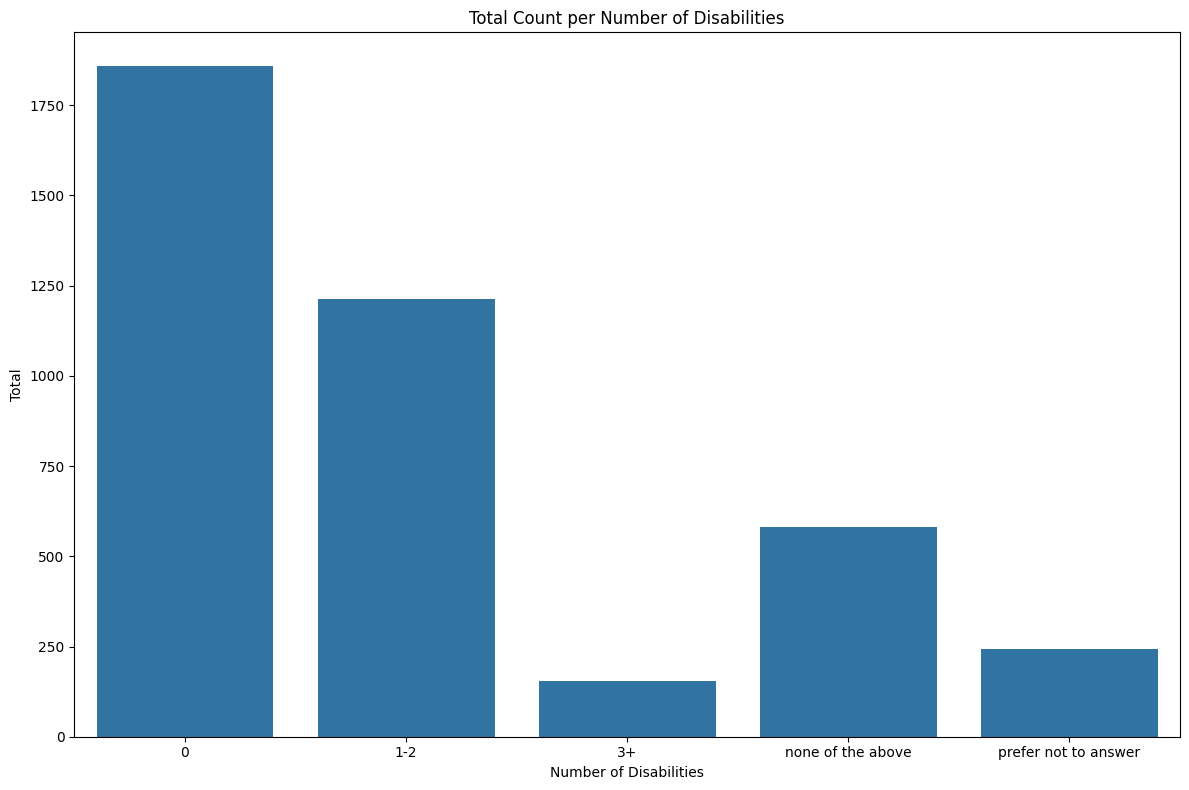

In [37]:
# plotting the overall_summary results:
plt.figure(figsize=(12, 8))
sns.barplot(
    data= overall_summary,
    x ='disability_bin',
    y ='total',
    errorbar=None
)

#plt.xticks(rotation=90)
plt.xlabel('Number of Disabilities')
plt.ylabel('Total')
plt.title('Total Count per Number of Disabilities')


# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure
plt.savefig('disabilities_number_summary.png', dpi=300, bbox_inches='tight')

# show figure
plt.show()

In [38]:
overall_summary.to_csv('binned_diabilities.csv')

In [39]:
summary = {}
for column in NS_disability.columns[1:-3]:
    disability = column.split('_')
    disability = ' '.join(disability[1:])
    
    if disability == 'none':
        disability = 'none of the above'
        
    summary.update({disability: NS_disability[column].sum(axis = 0)})

In [40]:
# create a dataframe from the above summary dictionary:
disability_summary = pd.DataFrame({'disability' : summary.keys(),
             'total' : summary.values()})

In [52]:
disability_summary = disability_summary.sort_values(by = 'total', ascending = False)

In [53]:
disability_summary

,disability,total
14,no disability,1859
2,chronic pain,587
0,none of the above,582
6,mental,544
1,physical,491
7,prefer not to answer,244
5,learning,225
4,developmental,184
3,sensory,138
10,autoimmune,5


In [43]:
# save the summary dataframe:
disability_summary.to_csv('disability_summary.csv', index = False)

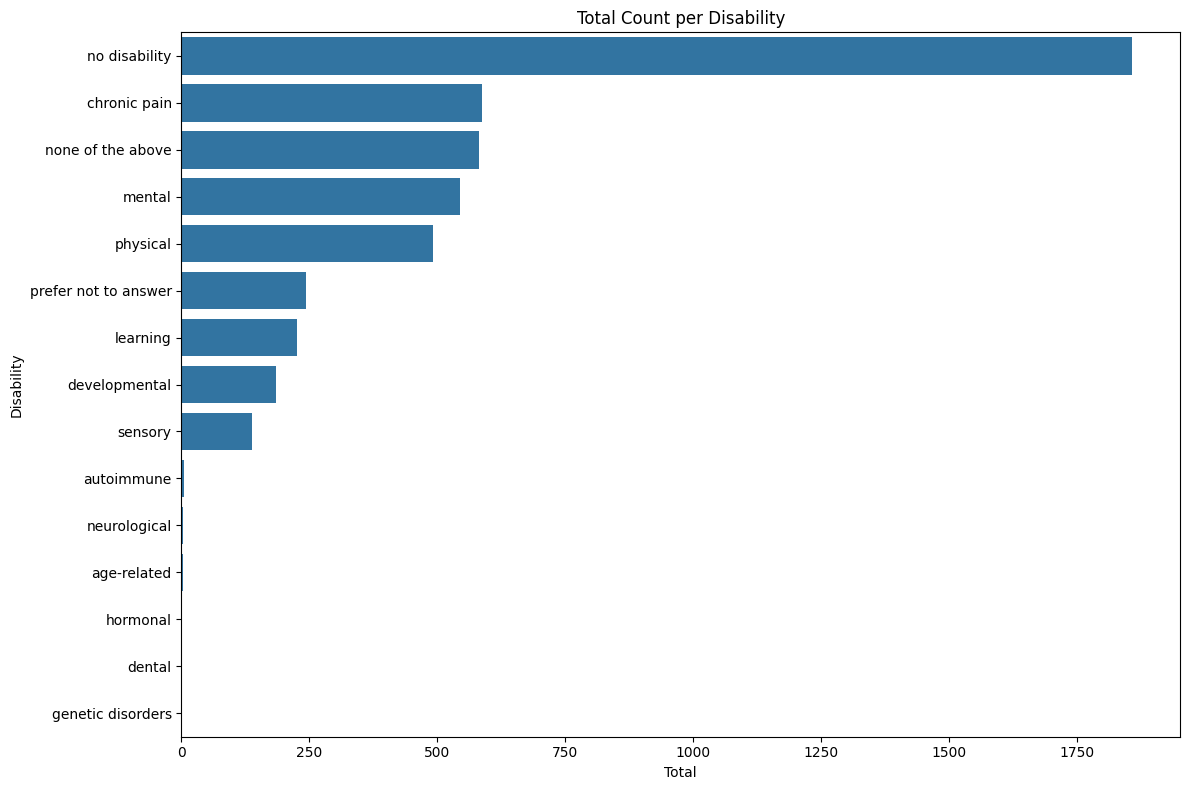

In [51]:
# plotting the disability_summary results:

plt.figure(figsize=(12, 8))
sns.barplot(
    data= disability_summary,
    x ='total',
    y ='disability',
    errorbar=None
)

plt.ylabel('Disability')
plt.xlabel('Total')
plt.title('Total Count per Disability')


# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure
plt.savefig('disability_summary.png', dpi=300, bbox_inches='tight')

# show figure
plt.show()